In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from scipy.stats import ranksums
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
import statsmodels as sm

In [3]:
tmdb = pd.read_csv('Downloads/aula0/tmdb_5000_movies.csv')

In [4]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\8355912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb['vote_average'])


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000')

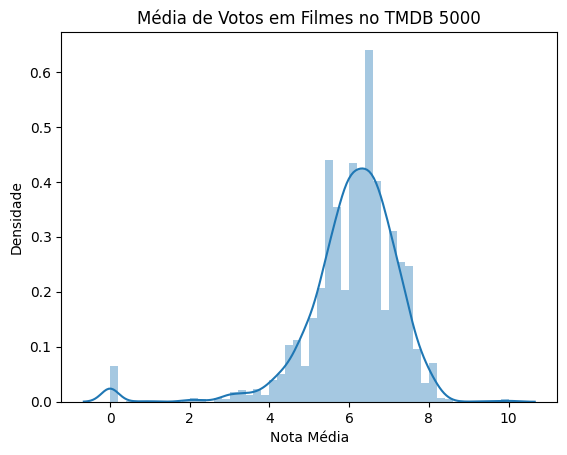

In [6]:
ax = sns.distplot(tmdb['vote_average'])
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set_title('Média de Votos em Filmes no TMDB 5000')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\2503432694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb['vote_average'], norm_hist=False, kde = False)


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000')

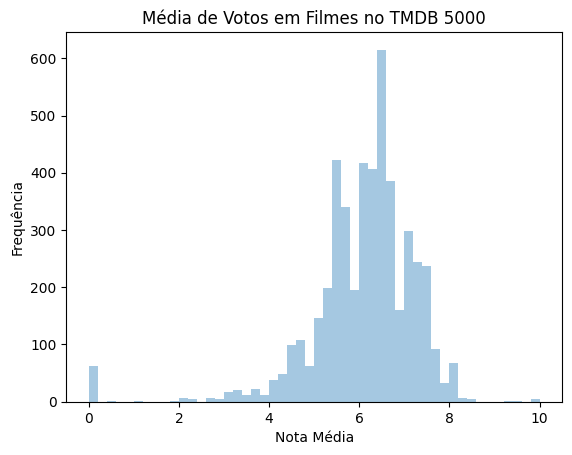

In [7]:
ax = sns.distplot(tmdb['vote_average'], norm_hist=False, kde = False)
ax.set(xlabel = 'Nota Média', ylabel = 'Frequência')
ax.set_title('Média de Votos em Filmes no TMDB 5000')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

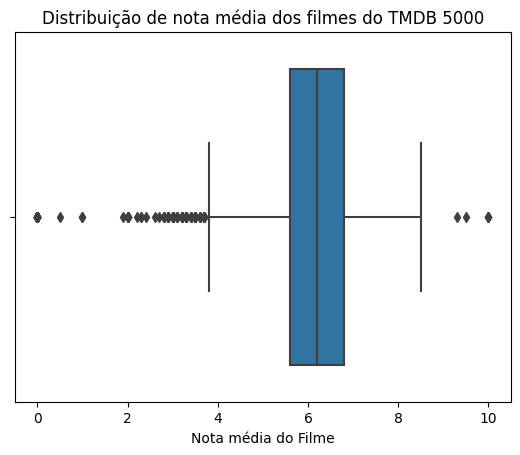

In [8]:
ax = sns.boxplot(x = tmdb['vote_average'])
ax.set(xlabel = 'Nota média do Filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')

In [9]:
#outlier de votos igual a zero
tmdb.query('vote_average == 0').head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [10]:
#outlier de votos igual a 10
tmdb.query('vote_average == 10').head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


In [11]:
tmdb_mais_10 = tmdb.query('vote_count >= 10')
tmdb_mais_10.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\46559832.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_mais_10['vote_average'], norm_hist=False, kde = False)


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000 - Com 10 ou mais votos')

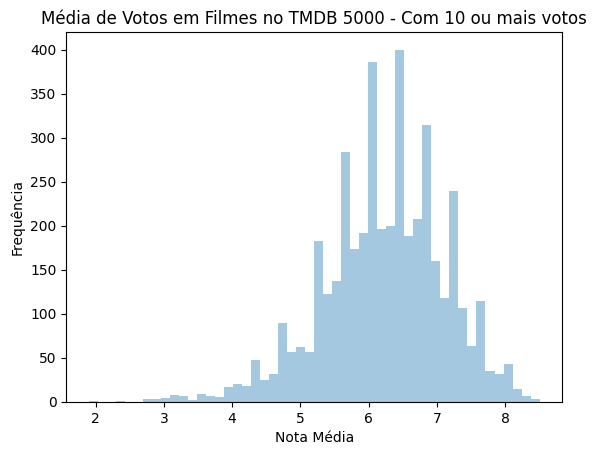

In [12]:
ax = sns.distplot(tmdb_mais_10['vote_average'], norm_hist=False, kde = False)
ax.set(xlabel = 'Nota Média', ylabel = 'Frequência')
ax.set_title('Média de Votos em Filmes no TMDB 5000 - Com 10 ou mais votos')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\1557135529.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_mais_10['vote_average'])


Text(0.5, 1.0, 'Média de Votos em Filmes no TMDB 5000 - Com 10 ou mais votos')

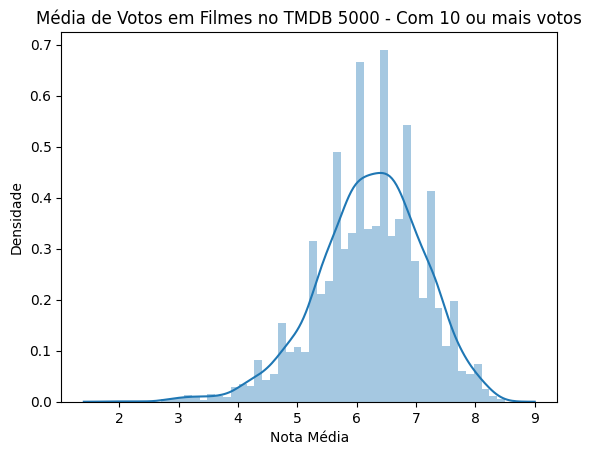

In [13]:
ax = sns.distplot(tmdb_mais_10['vote_average'])
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set_title('Média de Votos em Filmes no TMDB 5000 - Com 10 ou mais votos')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000 - Com 10 ou mais votos')

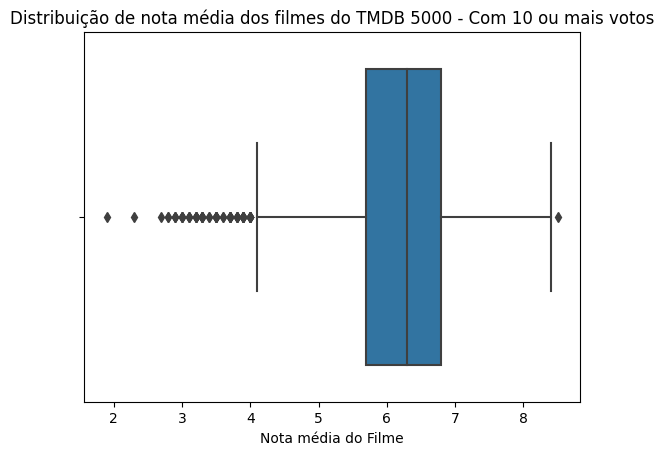

In [14]:
ax = sns.boxplot(x = tmdb_mais_10['vote_average'])
ax.set(xlabel = 'Nota média do Filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000 - Com 10 ou mais votos')

In [15]:
notas = pd.read_csv('Downloads/aula0/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\1752667151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nota_media_por_filme.values)


Text(0.5, 1.0, 'Média de Votos em Filmes no MovieLens 100K')

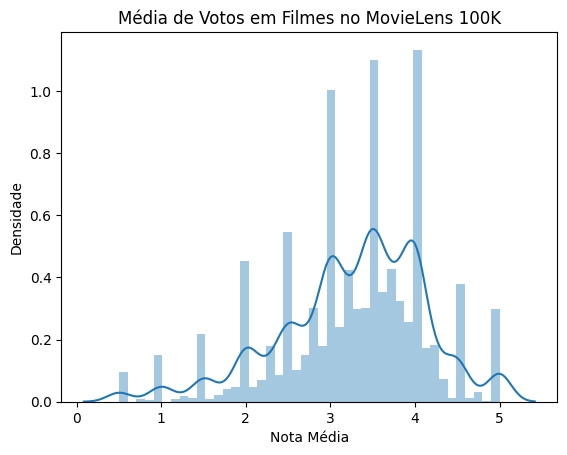

In [17]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set_title('Média de Votos em Filmes no MovieLens 100K')

In [18]:
q_por_filme = notas.groupby('movieId').count()
filmes_m10_votos = q_por_filme.query('rating >= 10').index
filmes_m10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [19]:
nota_media_por_filme.loc[filmes_m10_votos].head(5)

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\147190498.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nota_media_por_filme_m10_votos.values)


Text(0.5, 1.0, 'Média de Votos em Filmes no MovieLens 100K - 10 ou mais votos')

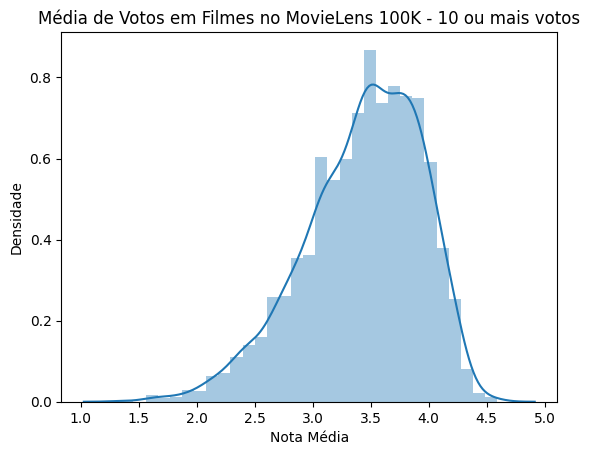

In [20]:
nota_media_por_filme_m10_votos = nota_media_por_filme.loc[filmes_m10_votos]
ax = sns.distplot(nota_media_por_filme_m10_votos.values)
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade')
ax.set_title('Média de Votos em Filmes no MovieLens 100K - 10 ou mais votos')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do MovieLens 100K - Com 10 ou mais votos')

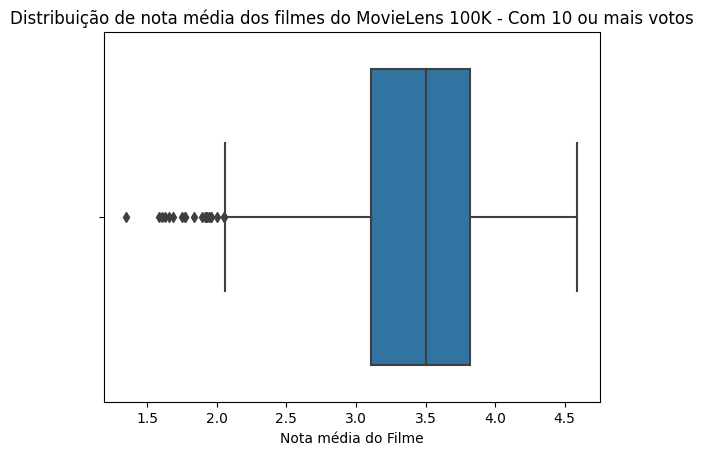

In [21]:
ax = sns.boxplot(x = nota_media_por_filme_m10_votos.values)
ax.set(xlabel = 'Nota média do Filme')
ax.set_title('Distribuição de nota média dos filmes do MovieLens 100K - Com 10 ou mais votos')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\1431094121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(nota_media_por_filme_m10_votos.values, hist_kws= {'cumulative': True}, kde_kws = {'cumulative': True})


Text(0.5, 1.0, 'Média de Votos em Filmes no MovieLens 100K - 10 ou mais votos')

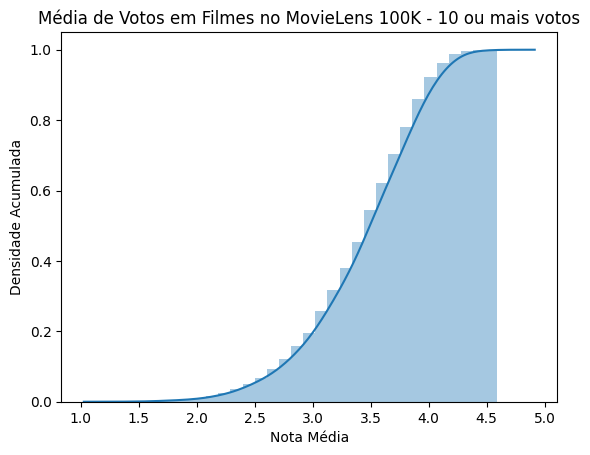

In [22]:
ax = sns.distplot(nota_media_por_filme_m10_votos.values, hist_kws= {'cumulative': True}, kde_kws = {'cumulative': True})
ax.set(xlabel = 'Nota Média', ylabel = 'Densidade Acumulada')
ax.set_title('Média de Votos em Filmes no MovieLens 100K - 10 ou mais votos')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\3248575154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb_mais_10['vote_count'])


Text(0.5, 1.0, 'Números de Votos em Filmes no TMDB 5000 - 10 ou mais votos')

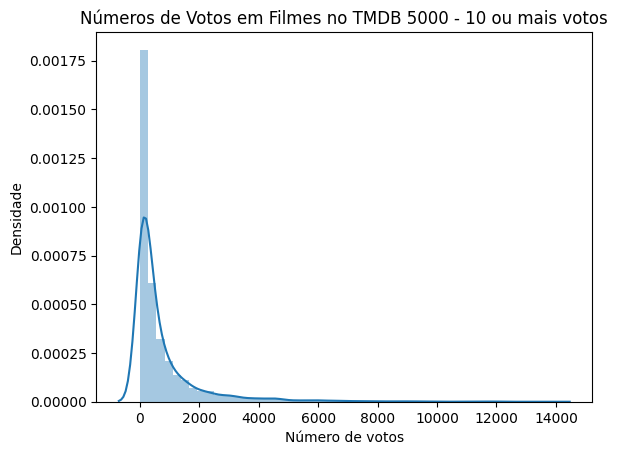

In [23]:
ax = sns.distplot(tmdb_mais_10['vote_count'])
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.set_title('Números de Votos em Filmes no TMDB 5000 - 10 ou mais votos')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\2973883052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.query('budget > 0')['budget'])


Text(0.5, 1.0, 'Gastos em Filmes no TMDB 5000')

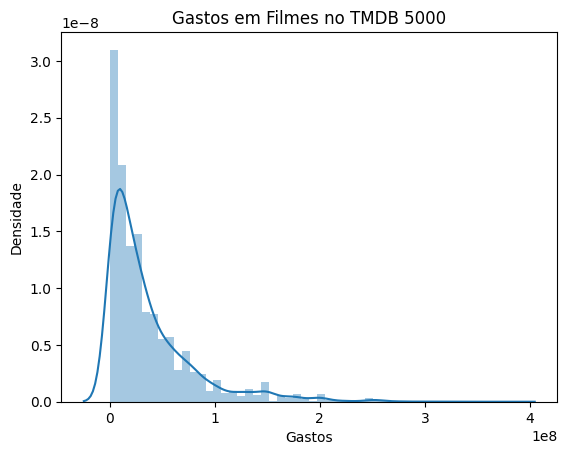

In [24]:
ax = sns.distplot(tmdb.query('budget > 0')['budget'])
ax.set(xlabel = 'Gastos', ylabel = 'Densidade')
ax.set_title('Gastos em Filmes no TMDB 5000')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\1081137428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb['popularity'])


Text(0.5, 1.0, 'Popularidade em Filmes no TMDB 5000')

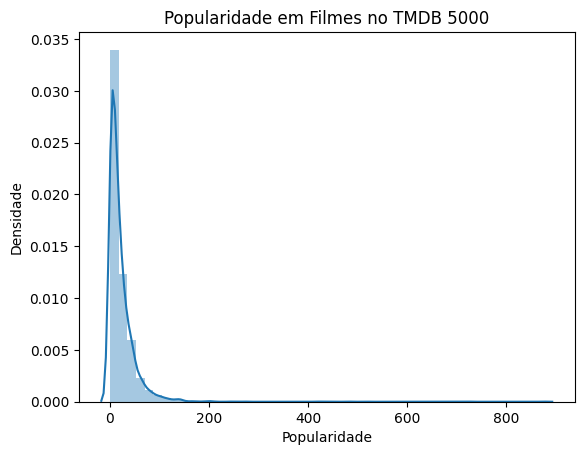

In [25]:
ax = sns.distplot(tmdb['popularity'])
ax.set(xlabel = 'Popularidade', ylabel = 'Densidade')
ax.set_title('Popularidade em Filmes no TMDB 5000')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\227267536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.query('runtime > 0')['runtime'].dropna())


Text(0.5, 1.0, 'Duração em Filmes no TMDB 5000')

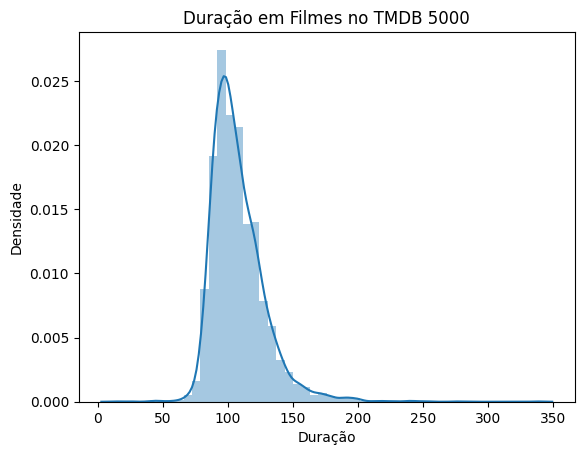

In [26]:
ax = sns.distplot(tmdb.query('runtime > 0')['runtime'].dropna())
ax.set(xlabel = 'Duração', ylabel = 'Densidade')
ax.set_title('Duração em Filmes no TMDB 5000')

C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\434148673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(tmdb.query('runtime > 0')['runtime'].dropna(), hist_kws={'cumulative': True}, kde_kws={'cumulative': True})


Text(0.5, 1.0, 'Duração em Filmes no TMDB 5000')

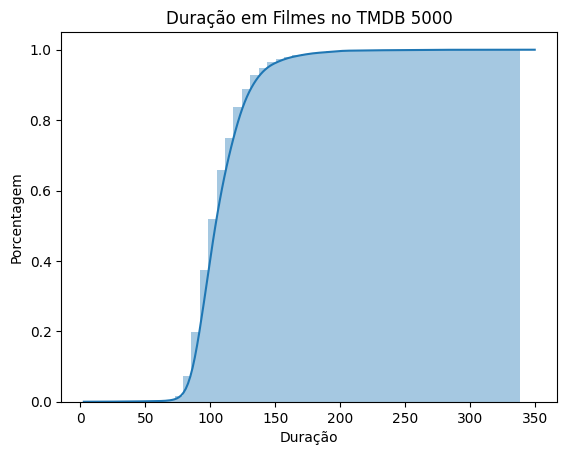

In [27]:
ax = sns.distplot(tmdb.query('runtime > 0')['runtime'].dropna(), hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel = 'Duração', ylabel = 'Porcentagem')
ax.set_title('Duração em Filmes no TMDB 5000')

In [28]:
tmdb.query('runtime > 0')['runtime'].dropna().quantile(0.8)

121.0

In [29]:
nota_media_por_filme_m10_votos.mean()

3.4320503405352594

In [30]:
len(nota_media_por_filme_m10_votos)

2269

In [31]:
medias = []
for i in range(1,len(nota_media_por_filme_m10_votos)):
    medias.append(nota_media_por_filme_m10_votos[0:i].mean())
medias[0:5]

[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653]

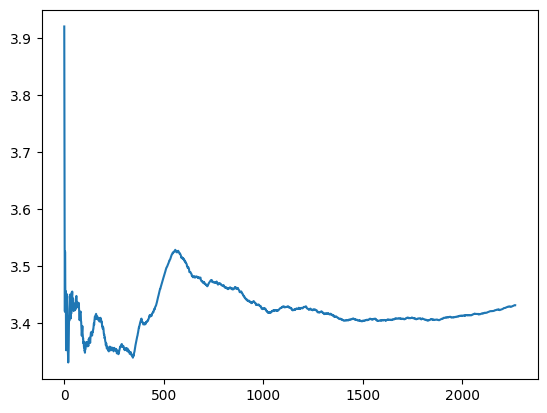

In [32]:
plt.plot(medias)

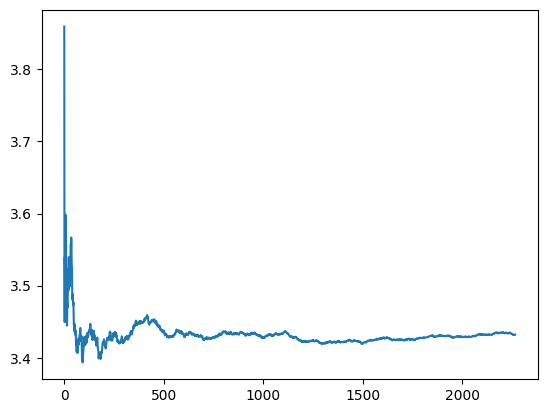

In [33]:
medias = []
np.random.seed(75243)
temp = nota_media_por_filme_m10_votos.sample(frac=1)
for i in range(1,len(temp)):
    medias.append(temp[0:i].mean())
plt.plot(medias)

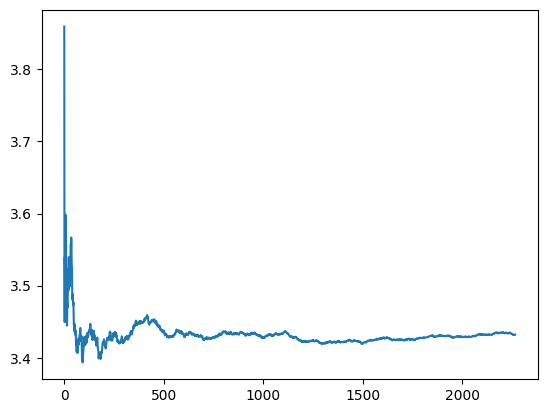

In [34]:
#maneira diferente de usar o for
np.random.seed(75243)
temp = nota_media_por_filme_m10_votos.sample(frac=1)
medias = list()
medias = [temp[0:i].mean() for i in range(1,len(temp))]
plt.plot(medias)

**Os dados até agora fram feitos com base em amostras, agora faremos uma estimativa geral para todos os filmes**

In [35]:
#Intervalos de confiança dos filmes em geral
zconfint(nota_media_por_filme_m10_votos)

(3.4112459477469557, 3.452854733323563)

In [36]:
#Z-test utilizado em conjuntos maiores (>30 elementos)
#T-test utilizado em conjuntos menores

descr_todos_com_10_votos = DescrStatsW(nota_media_por_filme_m10_votos)
descr_todos_com_10_votos.tconfint_mean()

#quase os mesmo resultados do Z-test

(3.411234839229381, 3.4528658418411395)

In [37]:
filmes = pd.read_csv('Downloads/aula0/movies.csv')
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


C:\Users\axel.chepanski\AppData\Local\Temp\ipykernel_18252\274754765.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(notas1['rating'])


Text(0.5, 1.0, 'Notas para o Toy Story')

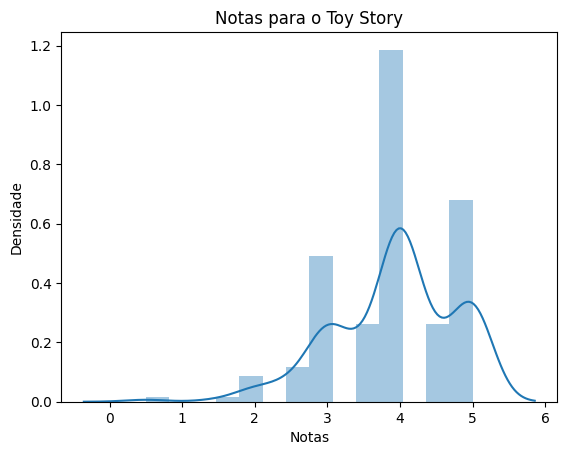

In [38]:
notas1 = notas.query('movieId==1')
ax = sns.distplot(notas1['rating'])
ax.set(xlabel = 'Notas', ylabel = 'Densidade')
ax.set_title('Notas para o Toy Story')

Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

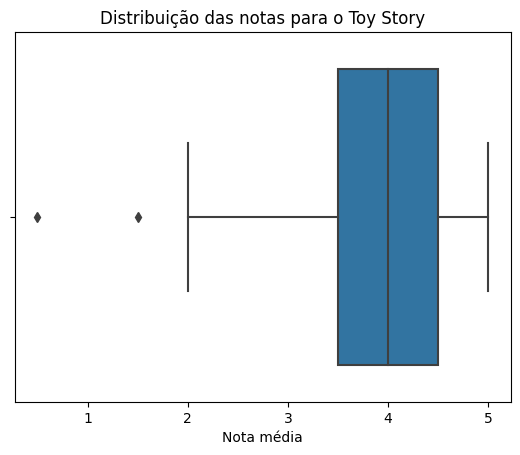

In [39]:
ax = sns.boxplot(x = notas1['rating'])
ax.set(xlabel = 'Nota média')
ax.set_title('Distribuição das notas para o Toy Story')

In [40]:
notas1['rating'].mean()

3.9209302325581397

In [41]:
notas1['rating'].count()

215

In [42]:
zconfint(notas1['rating'])

(3.8093359183563402, 4.032524546759939)

In [43]:
#Verifica se o valor da media de notas1 é realmente igual ao value (se o value[1] retornado for <=5%, então não é igual)
ztest(notas1['rating'], value = 3.4320503405352594)

(8.586342305916732, 8.97819040188565e-18)

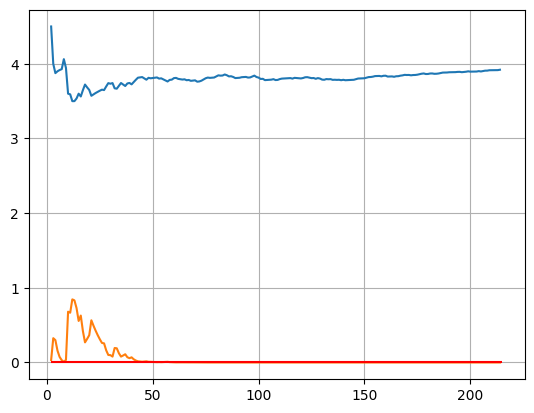

In [44]:
#maneira diferente de usar o for
np.random.seed(75241)
temp = notas1['rating'].sample(frac=1)
def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352594)
    return (i, media, p)
valores = np.array([calcula_teste(i) for i in range(2,len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.005, xmin=2, xmax = len(temp), color = 'r')
plt.grid()

In [45]:
#o resultado nos mostra que notas1 possui um intervalo de 0.2799245129192442 a 0.5588219849631111 notas mais altas que notas
#comparação de dois conjuntos de amostras
print(ztest(notas1['rating'], notas['rating']))
zconfint(notas1['rating'], notas['rating'])

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [46]:
print(ztest(notas['rating'], notas1['rating']))
zconfint(notas['rating'], notas1['rating'])

(-5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [47]:
#t-test direto do scipy
ttest_ind(notas['rating'], notas1['rating'])

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [48]:
import statsmodels as sm
sm.__version__

'0.14.0'

In [49]:
todas_as_notas = DescrStatsW(notas['rating'])
toystory = DescrStatsW(notas1['rating'])
comparação = todas_as_notas.get_compare(toystory)
#t_test
comparação.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [50]:
#z_test
comparação.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Dist das notas de acordo com filmes')

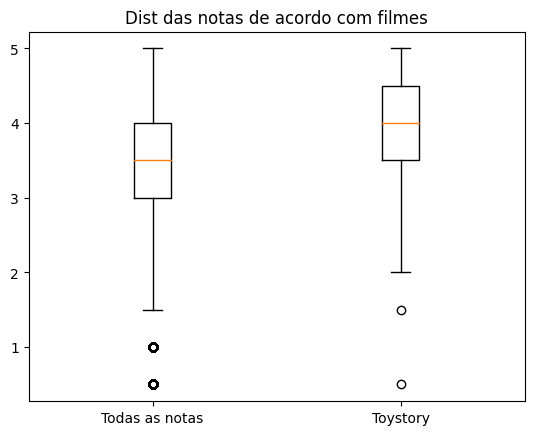

In [51]:
plt.boxplot([notas['rating'], notas1['rating']], labels = ['Todas as notas', 'Toystory'])
plt.title('Dist das notas de acordo com filmes')

Text(0.5, 1.0, 'Dist das notas de acordo com filmes')

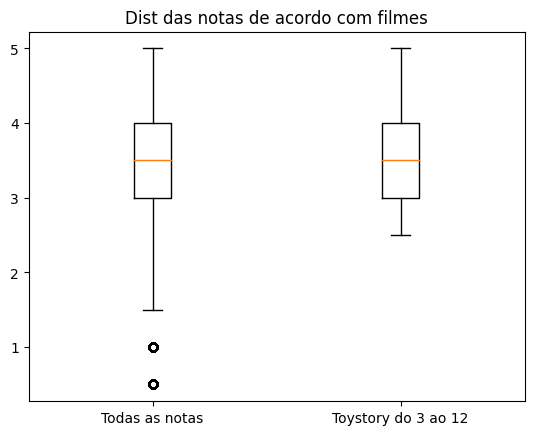

In [52]:
plt.boxplot([notas['rating'], notas1['rating'][3:12]], labels = ['Todas as notas', 'Toystory do 3 ao 12'])
plt.title('Dist das notas de acordo com filmes')

In [53]:
todas_as_notas = DescrStatsW(notas['rating'])
toystory = DescrStatsW(notas1['rating'][3:12])
comparação = todas_as_notas.get_compare(toystory)
#t_test
comparação.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


In [54]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Dist das notas de acordo com filmes')

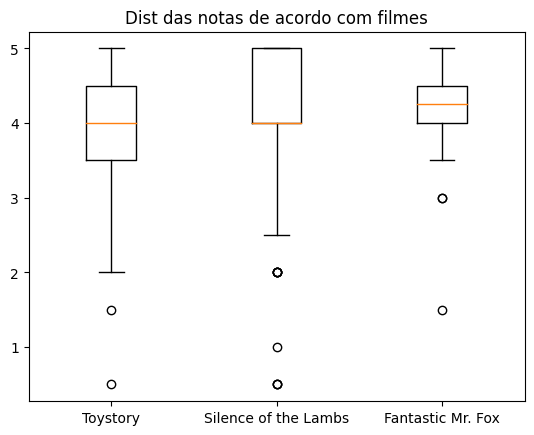

In [56]:
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

plt.boxplot([notas1['rating'], notas593['rating'], notas72226['rating']], labels = ['Toystory', 'Silence of the Lambs', 'Fantastic Mr. Fox'])
plt.title('Dist das notas de acordo com filmes')

<Axes: xlabel='movieId', ylabel='rating'>

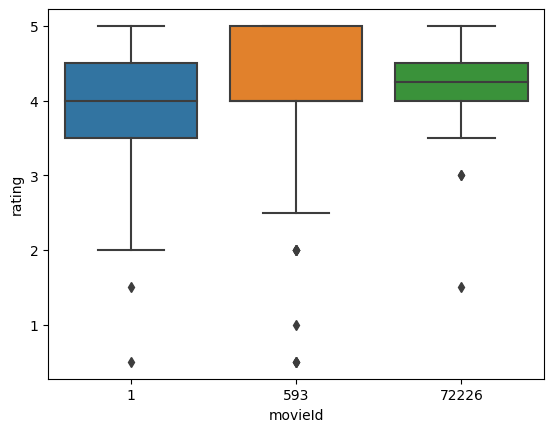

In [58]:
#sns é melhor quando os dados ainda não foram separados
sns.boxplot(x = 'movieId', y = 'rating', data = notas.query('movieId in (1, 593, 72226)'))

In [60]:
toystory = DescrStatsW(notas1['rating'])
silence = DescrStatsW(notas593['rating'])
comparação = toystory.get_compare(silence)
comparação.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [62]:
#Nesse caso a acompração dos dois filmes mostra que p_value não é significante pois é maior que 5% e o intervalo pode ser tanto pior quanto melhor
fantastic = DescrStatsW(notas72226['rating'])
comparação = fantastic.get_compare(silence)
comparação.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [64]:
#Nesse caso a acompração dos dois filmes mostra que p_value não é significante pois é maior que 5% e o intervalo pode ser tanto pior quanto melhor
comparação = toystory.get_compare(fantastic)
comparação.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [65]:
#Verificamos que existem poucos votos para o filme 72226, então melhor utilizar o t_test para comparação
notas.query('movieId in (1, 593, 72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [67]:
#Ex1:
comparação = silence.get_compare(fantastic)
comparação.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0780,0.208,0.374,0.708,-0.332,0.488


In [66]:
#Ex2:
comparação = toystory.get_compare(fantastic)
comparação.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [ ]:
#z_test, e t_test funcionam somente se a distribuição dos dados tendem a distribuição normal

In [70]:
#Como a resposta é menor que 5%, isso mostra que os dados de notas1 não vieram de uma distribuição normal
# _ só significa que não estamos utilizando uma das variáveis retornadas (stat)
_, p = normaltest(notas1['rating'])
p

0.00011053430732728716

In [73]:
#testes não parâmetricos (ranksums), para quando a distribuição não tende a uma normal
# O teste mostra que em geral, so for pego uma nota aleatória dos dois filmes, a chance de que a nota de notas593 seja maior que de notas1
# no final, nos leva a uma conclusão de que um filme é melhor do que outro
# Se a hipotese fosse nula, significaria que as amostras vieram de uma mesma distribuição.
_, p  = ranksums(notas1['rating'], notas593['rating'])
p

0.0003267718756440693